# Вариант №18


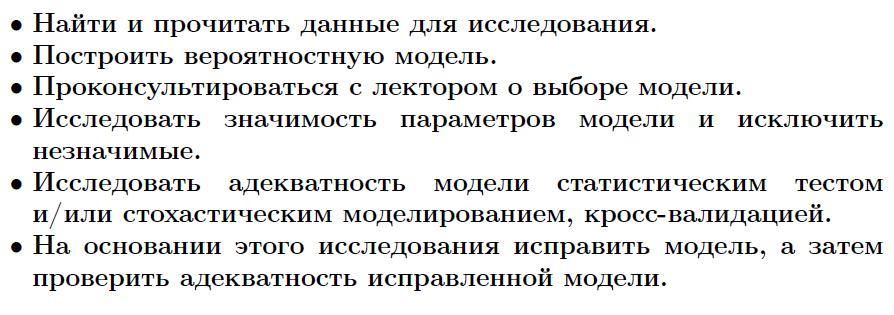

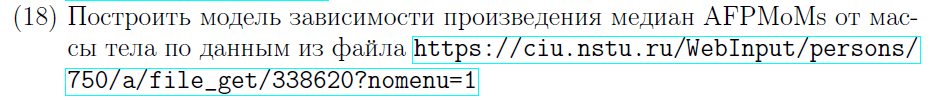



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from scipy import stats

# Считываем и предварительно анализируем данные

In [ ]:
data021 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/AFPMoMs (1).xls', sheet_name='FRA021', header=1).drop(['Item', 'AFPCorrMoM'], axis=1)
data021

,Weight,AFPMoM
0,77.0,0.881058
1,58.0,0.665130
2,92.0,0.710081
3,80.0,0.724889
4,78.0,0.816095
...,...,...
3262,69.0,0.521943
3263,67.0,1.016493
3264,66.0,1.049058
3265,68.0,0.869204


In [ ]:
data021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  3267 non-null   float64
 1   AFPMoM  3267 non-null   float64
dtypes: float64(2)
memory usage: 51.2 KB


In [ ]:
data004 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/AFPMoMs (1).xls', sheet_name='FRA004', header=1).drop(['Item', 'AFPCorrMoM'], axis=1)
data004

,Weight,AFPMoM
0,53.0,1.082874
1,51.0,1.471181
2,42.0,1.377934
3,77.0,1.120634
4,61.0,1.167810
...,...,...
2342,68.0,0.331955
2343,63.0,1.066856
2344,72.0,0.729929
2345,71.0,0.674217


In [ ]:
data004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  2347 non-null   float64
 1   AFPMoM  2347 non-null   float64
dtypes: float64(2)
memory usage: 36.8 KB


In [ ]:
data011 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/AFPMoMs (1).xls', sheet_name='FRA011', header=1).drop(['Item', 'AFPCorrMoM'], axis=1)
data011

,Weight,AFPMoM
0,64,1.308024
1,59,0.676557
2,66,0.886367
3,70,2.640439
4,62,1.447836
...,...,...
1300,68,1.463709
1301,62,1.255599
1302,65,1.093078
1303,82,0.670205


In [ ]:
data011.info()
data011['Weight'] = data011['Weight'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  1305 non-null   int64  
 1   AFPMoM  1305 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.5 KB


In [ ]:
data011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  1305 non-null   float64
 1   AFPMoM  1305 non-null   float64
dtypes: float64(2)
memory usage: 20.5 KB


In [ ]:
data = pd.concat([data021, data004, data011], ignore_index=True)
data = data.dropna(how='any', axis=0)
data_sorted = data.sort_values(by='Weight')
data_sorted

,Weight,AFPMoM
2499,36.0,1.015283
599,38.0,2.008537
5179,39.0,1.441792
4179,40.0,1.194305
4093,40.0,1.626287
...,...,...
3697,140.0,0.291456
1383,141.0,0.532106
2802,145.0,0.774638
2377,146.0,0.512047


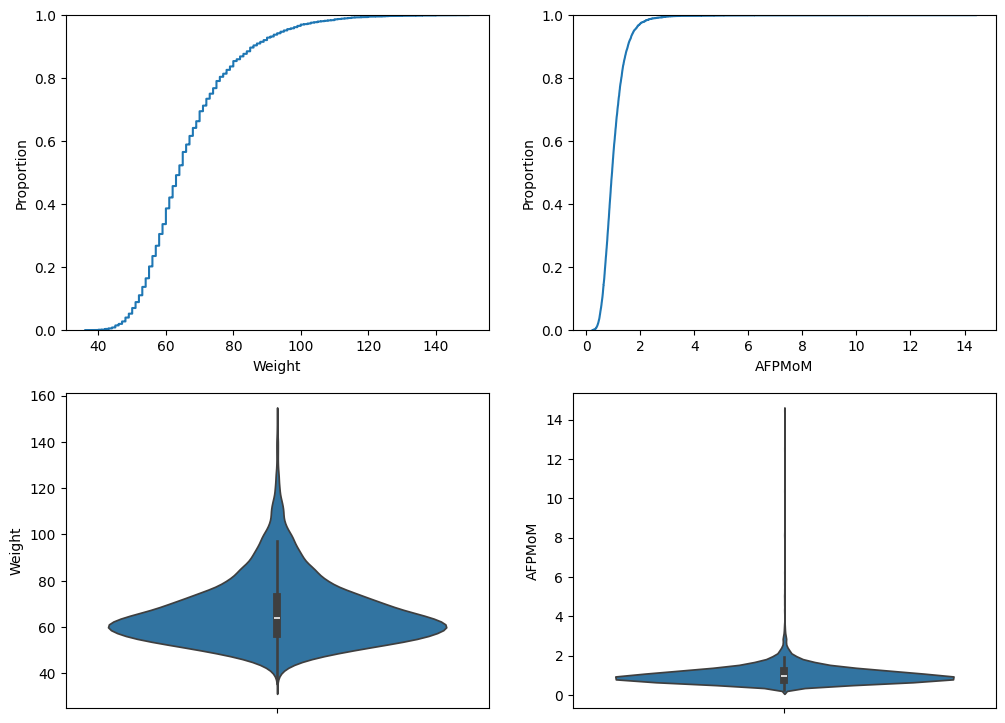

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
p1 = sns.ecdfplot(data_sorted, x=data_sorted['Weight'], ax=axes[0, 0])
p2 = sns.ecdfplot(data_sorted, x=data_sorted['AFPMoM'], ax=axes[0, 1])
p3 = sns.violinplot(data_sorted['Weight'], ax=axes[1, 0])
p4 = sns.violinplot(data_sorted['AFPMoM'], ax=axes[1, 1])
plt.show()

In [ ]:
data_sorted.describe()
data = data_sorted.copy()
data1 = data_sorted.copy()

In [ ]:
# выбросы
array=data_sorted.to_numpy()
q_025 = np.quantile(array[:, 0], 0.25)
q_075 = np.quantile(array[:, 0], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 2 * iqd
lower_limit = q_025 - 1.2 * iqd

print('Верхняя граница веса=', upper_limit)
print('Нижняя граница веса=', lower_limit)

ejections_weight = data_sorted[(data_sorted['Weight'] > upper_limit) | (data_sorted['Weight'] < lower_limit)]
data_sorted = data_sorted.drop(ejections_weight.index)


q_025 = np.quantile(array[:, 1], 0.25)
q_075 = np.quantile(array[:, 1], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.75 * iqd
lower_limit = q_025 - 1.75 * iqd

print('\nВерхняя граница AFPMoM=', upper_limit)
print('Нижняя граница AFPMoM=', lower_limit)

ejections_afp = data_sorted[(data_sorted['AFPMoM'] > upper_limit) | (data_sorted['AFPMoM'] < lower_limit)]
data_sorted = data_sorted.drop(ejections_afp.index)

ejections = pd.concat([ejections_weight, ejections_afp], ignore_index=False)

Верхняя граница веса= 105.0
Нижняя граница веса= 37.8

Верхняя граница AFPMoM= 2.060882746790111
Нижняя граница AFPMoM= -0.08515607036642536


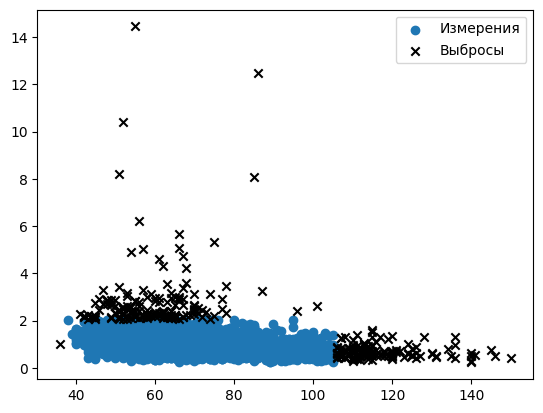

In [ ]:
plt.scatter(x=data_sorted['Weight'], y=data_sorted['AFPMoM'], label='Измерения')
plt.scatter(x=ejections['Weight'], y=ejections['AFPMoM'], c='black', marker='x', label='Выбросы')
plt.legend()
plt.show()

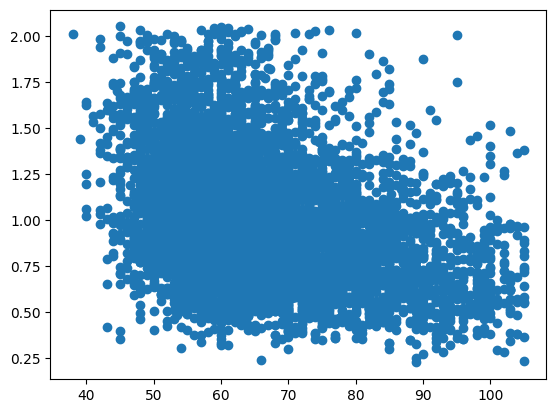

In [ ]:
plt.scatter(x=data_sorted['Weight'], y=data_sorted['AFPMoM'])
plt.show()

Необходимо построить модель зависимости значения AFPMoM от веса. Это значит, что построенная модель будет предполагать значение 'AFPMoM' на основе 'Weight'. Это задача регресии. В качестве ее решения опробуем различные регрессионные модели и оценим их адекватность.

# Регрессионные модели

## Простая линейная регрессия

In [ ]:
arr=data_sorted.to_numpy()
X=arr[:,0]
Y=arr[:,1]

X1 = sm.add_constant(X)
model = sm.OLS(Y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     865.9
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          5.69e-179
Time:                        12:56:21   Log-Likelihood:                -1839.6
No. Observations:                6617   AIC:                             3683.
Df Residuals:                    6615   BIC:                             3697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6124      0.021     76.271      0.0

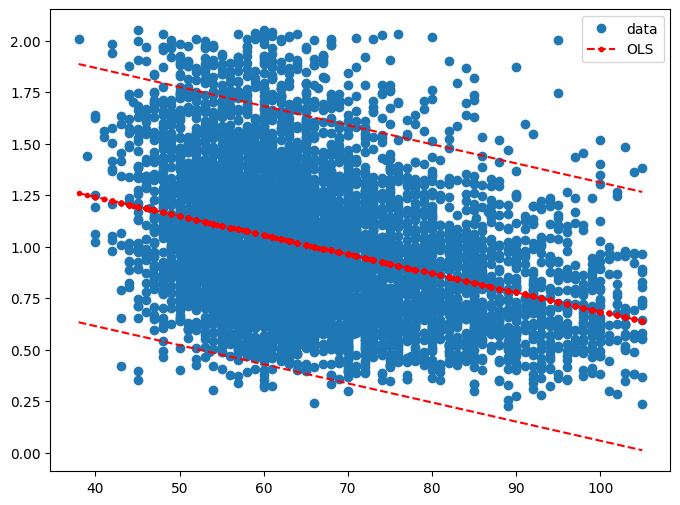

In [ ]:
res=sm.OLS(Y, X1).fit()
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, res.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

J_n = 1.211708618623737
upper_p_value = 0.10608891642862056


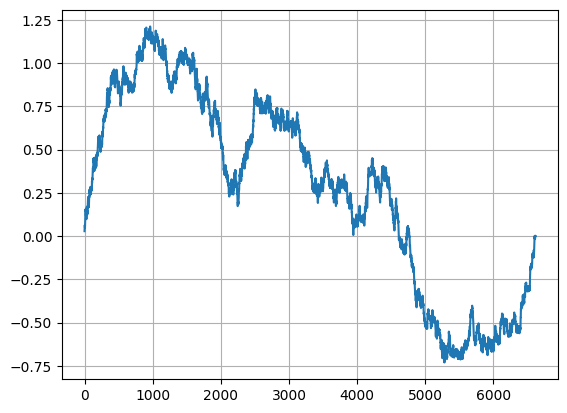

In [ ]:
# Эмпирический мост
simple_regr_res=Y-res.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)
print('J_n =',J)
print('upper_p_value =',p_value)

plt.plot(emp_bridge)
plt.grid()
plt.show()

## Регрессия на X^2

In [ ]:
arr=data_sorted.to_numpy()
X=arr[:,0]
Y=arr[:,1]

X2=np.power(X,2)
X2_1 = sm.add_constant(X2)
results=sm.OLS(Y, X2_1).fit()
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     819.4
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          5.40e-170
Time:                        12:56:22   Log-Likelihood:                -1860.3
No. Observations:                6617   AIC:                             3725.
Df Residuals:                    6615   BIC:                             3738.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2862      0.011    120.099      0.0

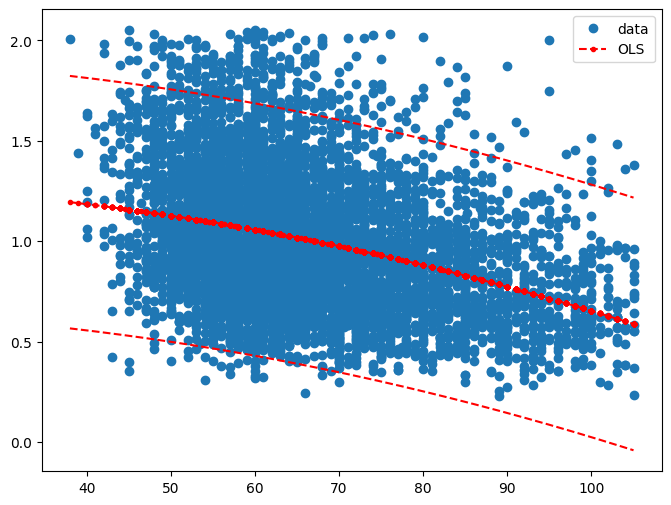

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, results.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

J_n = 2.0204339059063594
upper_p_value = 0.0005692680439656022


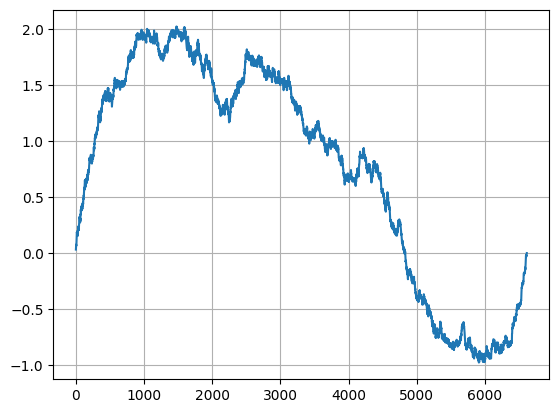

In [ ]:
# Эмпирический мост
simple_regr_res=Y-results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)
print('J_n =', J)
print('upper_p_value =', p_value)
plt.plot(emp_bridge)
plt.grid()
plt.show()

## Логарифмическая модель

In [ ]:
arr=data_sorted.to_numpy()
X=arr[:,0]
Y=arr[:,1]

LX=np.log(X)
LY=np.log(Y)
LX1 = sm.add_constant(LX)

results=sm.OLS(LY, LX1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     978.9
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.57e-200
Time:                        12:56:23   Log-Likelihood:                -1923.1
No. Observations:                6617   AIC:                             3850.
Df Residuals:                    6615   BIC:                             3864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7949      0.091     30.631      0.0

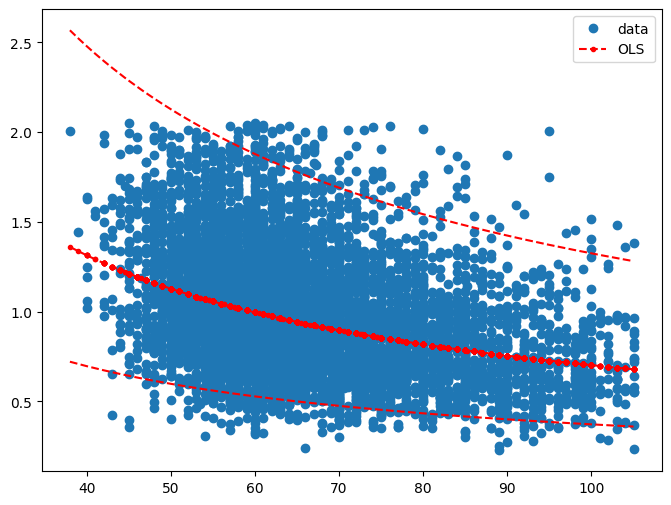

In [ ]:
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, np.exp(results.fittedvalues), "r--.", label="OLS")
ax.plot(X, np.exp(iv_u), "r--")
ax.plot(X, np.exp(iv_l), "r--")
ax.legend(loc="best")
plt.show()

J_n = 0.8814424477914847
upper_p_value = 0.4188567868812675


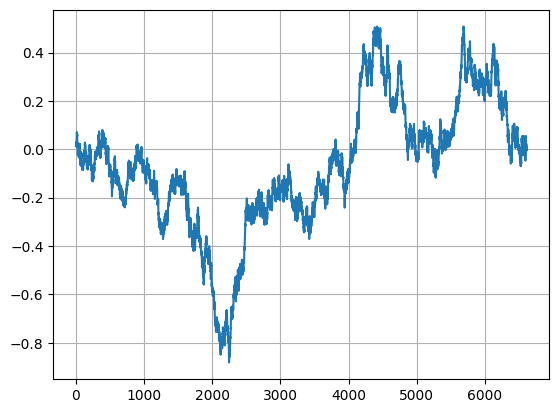

In [ ]:
# Эмпирический мост
simple_regr_res=LY-results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)
print('J_n =', J)
print('upper_p_value =', p_value)
plt.plot(emp_bridge)
plt.grid()
plt.show()

Анализируя построенные графики эмпирических мостов, а также полученные коэффициенты, приходим к выводу, что наиболее подходящей будет логарифмическая модель. Верхняя оценка p-value = 0,4188567868812675. Найдем эмпирическое p значение путем проведения 20 000 стохастических моделирований.

In [ ]:
n_iter = 20000
n=len(X)
counter = 0
for i in range(n_iter):
  Y_temp = stats.norm.rvs(0, 1, n)*sigma + LX
  res=sm.OLS(Y_temp, LX1).fit()
  simple_regr_res = Y_temp-res.fittedvalues
  sum_regr_res = np.cumsum(simple_regr_res)
  emp_bridge = sum_regr_res/len(sum_regr_res)**0.5/np.std(simple_regr_res)
  J_temp=np.max(np.abs(emp_bridge))
  if J_temp>J:
    counter+=1
print('Эмпирическое пи-значение =', counter/n_iter)

Эмпирическое пи-значение = 0.10045


Имеем удовлетворительное эмпирическое пи-значение. Это дает понять, что подобная регрессионная модель является вполне удачной для описания зависимости с таким набором данных.

# Построение на прологарифмированных данных о весе
Ряд предыдущих вычислений был выполнен после довольно грубого исключения выбросов (помимо значений, которые можно действительно принять за патологические и исключить, чтобы они не оказывали значительное влияние на построение модели, был также исключен довольно большой массив данных близких к стандартным).

Чтобы учесть как можно больше значений (которые по сути являются вполне точными и реальными, потому их не стоит исключать), необходимо прологарифмировать исходные данные, чтобы уменьшить разброс значений.

Для начала попробуем прологарифмировать данные по только по весу (отрицательных у нулевых значений нет).

## Логарифмирование, выбросы

In [ ]:
data

,Weight,AFPMoM
2499,36.0,1.015283
599,38.0,2.008537
5179,39.0,1.441792
4179,40.0,1.194305
4093,40.0,1.626287
...,...,...
3697,140.0,0.291456
1383,141.0,0.532106
2802,145.0,0.774638
2377,146.0,0.512047


In [ ]:
data['Weight'] = np.log(data['Weight'])
data

,Weight,AFPMoM
2499,3.583519,1.015283
599,3.637586,2.008537
5179,3.663562,1.441792
4179,3.688879,1.194305
4093,3.688879,1.626287
...,...,...
3697,4.941642,0.291456
1383,4.948760,0.532106
2802,4.976734,0.774638
2377,4.983607,0.512047


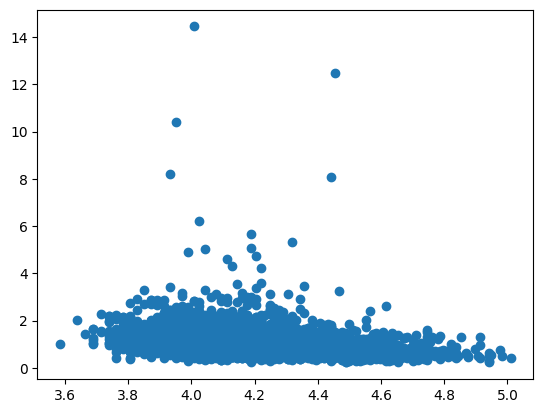

In [ ]:
# построим график
plt.scatter(x=data['Weight'], y=data['AFPMoM'])
plt.show()

In [ ]:
# выбросы
array1 = data.to_numpy()
q_025 = np.quantile(array1[:,0], 0.25)
q_075 = np.quantile(array1[:,0], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 2.5 * iqd
lower_limit = q_025 - 1.2 * iqd

print('Верхняя граница веса=', upper_limit)
print('Нижняя граница веса=', lower_limit)

ejections_weight1 = data[(data['Weight'] > upper_limit) | (data['Weight'] < lower_limit)]
data = data.drop(ejections_weight1.index)


q_025 = np.quantile(array1[:,1], 0.25)
q_075 = np.quantile(array1[:,1], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 3 * iqd
lower_limit = q_025 - iqd

print('\nВерхняя граница AFPMoM=', upper_limit)
print('Нижняя граница AFPMoM=', lower_limit)

ejections_afp1 = data[(data['AFPMoM'] > upper_limit) | (data['AFPMoM'] < lower_limit)]
data = data.drop(ejections_afp1.index)

ejections1 = pd.concat([ejections_weight1, ejections_afp1], ignore_index=False)

Верхняя граница веса= 4.908979874432992
Нижняя граница веса= 3.7461614598579414

Верхняя граница AFPMoM= 2.657004640444704
Нижняя граница AFPMoM= 0.27251706582633073


In [ ]:
ejections1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 2499 to 6610
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  97 non-null     float64
 1   AFPMoM  97 non-null     float64
dtypes: float64(2)
memory usage: 2.3 KB


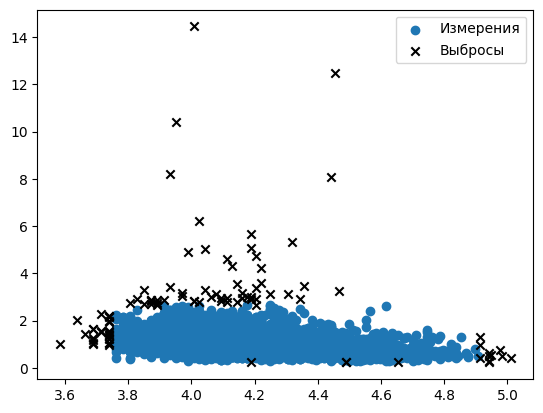

In [ ]:
plt.scatter(x=data['Weight'], y=data['AFPMoM'], label='Измерения')
plt.scatter(x=ejections1['Weight'], y=ejections1['AFPMoM'], c='black', marker='x', label='Выбросы')
plt.legend()
plt.show()

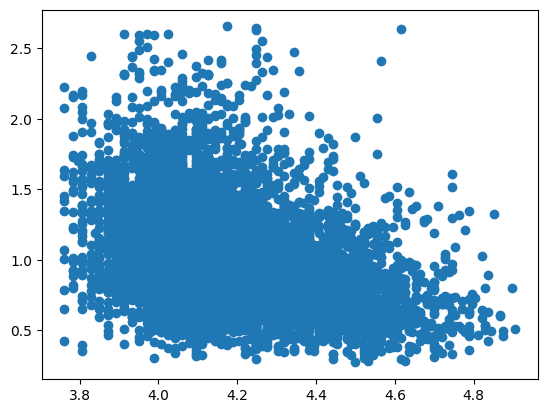

In [ ]:
plt.scatter(x=data['Weight'], y=data['AFPMoM'])
plt.show()

Теперь опробуем вышеупомянутые регрессионные модели

## Простая линейная регрессия

In [ ]:
arr=data.to_numpy()
X=arr[:,0]
Y=arr[:,1]

X1 = sm.add_constant(X)
model = sm.OLS(Y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     925.6
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          9.20e-191
Time:                        12:57:23   Log-Likelihood:                -2509.2
No. Observations:                6822   AIC:                             5022.
Df Residuals:                    6820   BIC:                             5036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7772      0.091     41.539      0.0

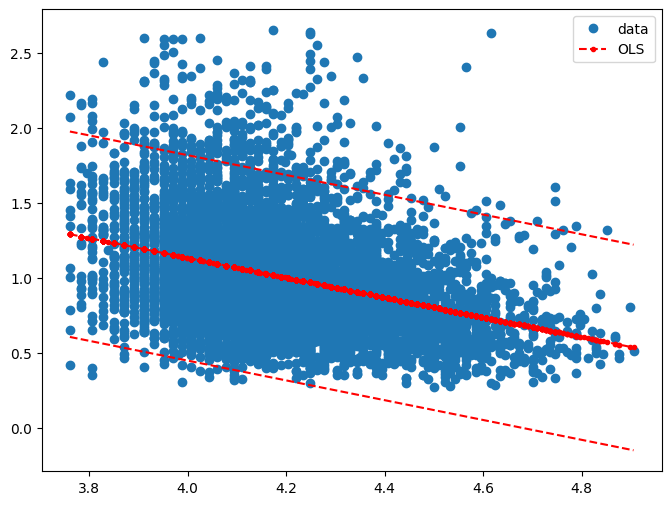

In [ ]:
res=sm.OLS(Y, X1).fit()
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, res.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

J_n = 0.811681819041492
upper_p_value = 0.5252583661428999


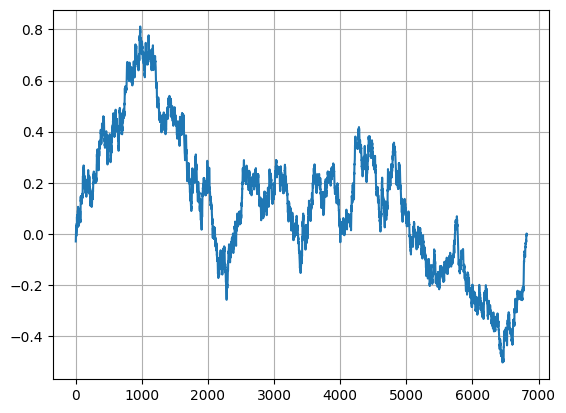

In [ ]:
# Эмпирический мост
simple_regr_res=Y-res.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)
print('J_n =',J)
print('upper_p_value =',p_value)

plt.plot(emp_bridge)
plt.grid()
plt.show()

In [ ]:
# стохастическое моделирование
n_iter=20000
n=len(X)
counter=0
for i in range(n_iter):
  Y_temp=stats.norm.rvs(0,1,n)*sigma+X
  res=sm.OLS(Y_temp, X1).fit()
  simple_regr_res=Y_temp-res.fittedvalues
  sum_regr_res=np.cumsum(simple_regr_res)
  emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/np.std(simple_regr_res)
  J_temp=np.max(np.abs(emp_bridge))
  if J_temp>J:
    counter+=1
print('Эмпирическое пи-значение =',counter/n_iter)

Эмпирическое пи-значение = 0.1999


## Регрессия на X^2

In [ ]:
arr=data.to_numpy()
X=arr[:,0]
Y=arr[:,1]

X2=np.power(X,2)
X2_1 = sm.add_constant(X2)
results=sm.OLS(Y, X2_1).fit()
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     919.1
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.68e-189
Time:                        12:58:21   Log-Likelihood:                -2512.1
No. Observations:                6822   AIC:                             5028.
Df Residuals:                    6820   BIC:                             5042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3734      0.045     52.683      0.0

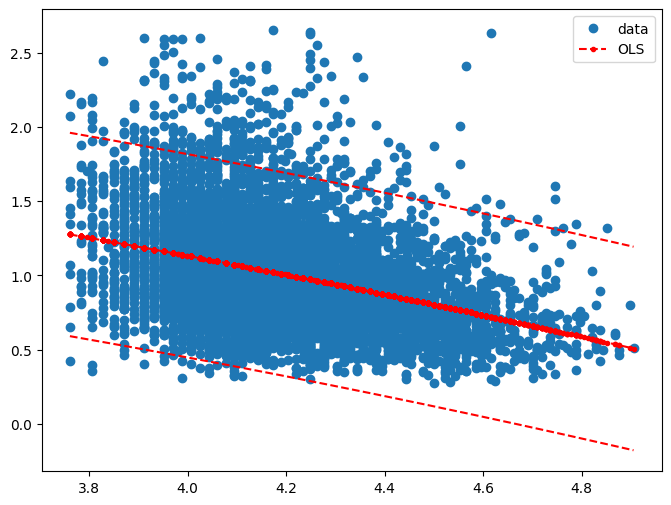

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, results.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

J_n = 1.0125305431659335
upper_p_value = 0.2568091927074604


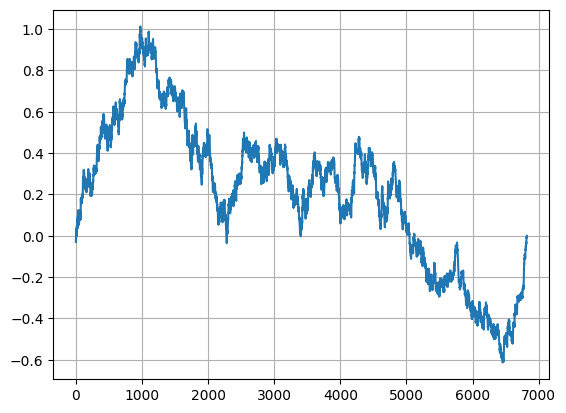

In [ ]:
# Эмпирический мост
simple_regr_res=Y-results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)
print('J_n =', J)
print('upper_p_value =', p_value)
plt.plot(emp_bridge)
plt.grid()
plt.show()

## Логарифмическая модель

In [ ]:
arr=data.to_numpy()
X=arr[:,0]
Y=arr[:,1]

LX=np.log(X)
LY=np.log(Y)
LX1 = sm.add_constant(LX)

results=sm.OLS(LY, LX1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1108.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          2.63e-225
Time:                        12:58:22   Log-Likelihood:                -2241.2
No. Observations:                6822   AIC:                             4486.
Df Residuals:                    6820   BIC:                             4500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1563      0.126     32.867      0.0

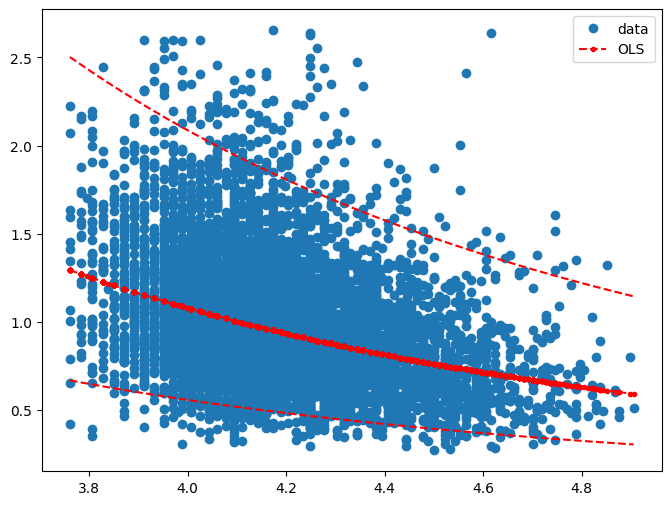

In [ ]:
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, np.exp(results.fittedvalues), "r--.", label="OLS")
ax.plot(X, np.exp(iv_u), "r--")
ax.plot(X, np.exp(iv_l), "r--")
ax.legend(loc="best")
plt.show()

J_n = 0.8833621163185073
upper_p_value = 0.4161081226465627


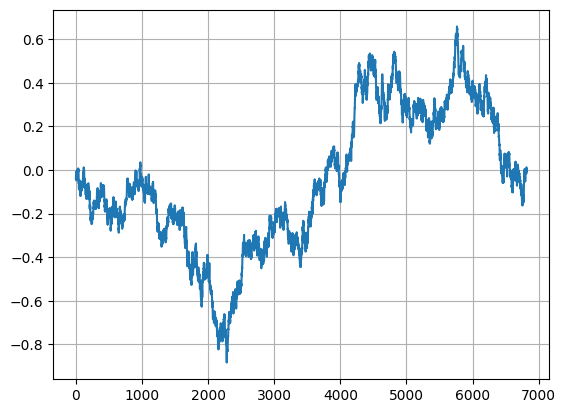

In [ ]:
# Эмпирический мост
simple_regr_res=LY-results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)
print('J_n =', J)
print('upper_p_value =', p_value)
plt.plot(emp_bridge)
plt.grid()
plt.show()

In [ ]:
# стохастическое моделирование
n_iter = 20000
n=len(X)
counter = 0
for i in range(n_iter):
  Y_temp = stats.norm.rvs(0, 1, n)*sigma + LX
  res=sm.OLS(Y_temp, LX1).fit()
  simple_regr_res = Y_temp-res.fittedvalues
  sum_regr_res = np.cumsum(simple_regr_res)
  emp_bridge = sum_regr_res/len(sum_regr_res)**0.5/np.std(simple_regr_res)
  J_temp=np.max(np.abs(emp_bridge))
  if J_temp>J:
    counter+=1
print('Эмпирическое пи-значение =', counter/n_iter)

Эмпирическое пи-значение = 0.10925


Получили что наиболее удачными здесь являются линейная и логарифмическая модели. Проводим для них стохастическое моделирование, чтобы определить какая будет наиболее подходящей.

# Построение на полностью прологарифмированных данных

Теперь посмотрим, какой результат получится, если мы прологарифмируем не только "Weight", но и "AFPMoMs"(среди значений нет отрицательных или равных нулю).

## Логарифмирование, выбросы

In [ ]:
data1

,Weight,AFPMoM
2499,36.0,1.015283
599,38.0,2.008537
5179,39.0,1.441792
4179,40.0,1.194305
4093,40.0,1.626287
...,...,...
3697,140.0,0.291456
1383,141.0,0.532106
2802,145.0,0.774638
2377,146.0,0.512047


In [ ]:
data1['Weight'] = np.log(data1['Weight'])
data1['AFPMoM'] = np.log(data1['AFPMoM'])
data1

,Weight,AFPMoM
2499,3.583519,0.015168
599,3.637586,0.697407
5179,3.663562,0.365887
4179,3.688879,0.177564
4093,3.688879,0.486300
...,...,...
3697,4.941642,-1.232866
1383,4.948760,-0.630912
2802,4.976734,-0.255360
2377,4.983607,-0.669339


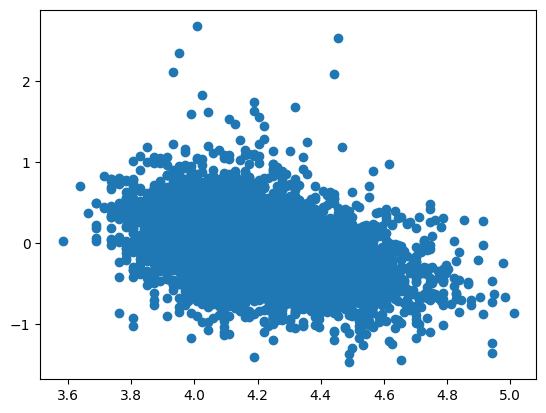

In [ ]:
# построим график
plt.scatter(x=data1['Weight'], y=data1['AFPMoM'])
plt.show()

In [ ]:
# выбросы
array2 = data.to_numpy()
q_025 = np.quantile(array2[:,0], 0.25)
q_075 = np.quantile(array2[:,0], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 2.5 * iqd
lower_limit = q_025 - 1.2 * iqd

print('Верхняя граница веса=', upper_limit)
print('Нижняя граница веса=', lower_limit)

ejections_weight2 = data1[(data1['Weight'] > upper_limit) | (data1['Weight'] < lower_limit)]
data1 = data1.drop(ejections_weight2.index)


q_025 = np.quantile(array2[:,1], 0.25)
q_075 = np.quantile(array2[:,1], 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 0.1 * iqd
lower_limit = q_025 - 3.9 * iqd

print('\nВерхняя граница AFPMoM=', upper_limit)
print('Нижняя граница AFPMoM=', lower_limit)

ejections_afp2 = data1[(data1['AFPMoM'] > upper_limit) | (data1['AFPMoM'] < lower_limit)]
data1 = data1.drop(ejections_afp2.index)

ejections2 = pd.concat([ejections_weight2, ejections_afp2], ignore_index=False)

Верхняя граница веса= 4.908979874432992
Нижняя граница веса= 3.7461614598579414

Верхняя граница AFPMoM= 1.2642615324839888
Нижняя граница AFPMoM= -1.084536291809697


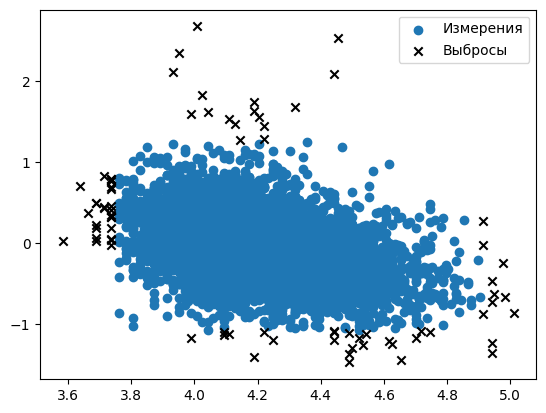

In [ ]:
plt.scatter(x=data1['Weight'], y=data1['AFPMoM'], label='Измерения')
plt.scatter(x=ejections2['Weight'], y=ejections2['AFPMoM'], c='black', marker='x', label='Выбросы')
plt.legend()
plt.show()

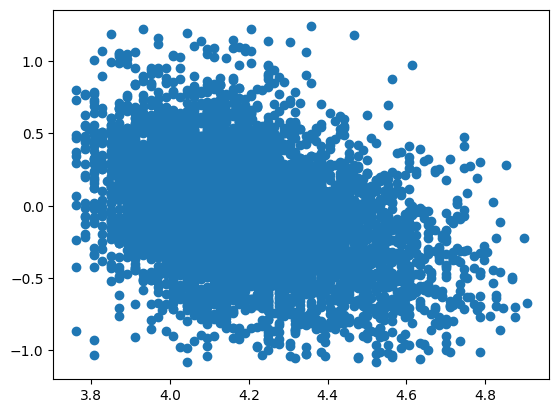

In [ ]:
plt.scatter(x=data1['Weight'], y=data1['AFPMoM'])
plt.show()

## Простая линейная регрессия


In [ ]:
arr=data1.to_numpy()
X=arr[:,0]
Y=arr[:,1]

X1 = sm.add_constant(X)
model = sm.OLS(Y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     1079.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          6.63e-220
Time:                        12:59:26   Log-Likelihood:                -2351.4
No. Observations:                6842   AIC:                             4707.
Df Residuals:                    6840   BIC:                             4720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8725      0.089     32.345      0.0

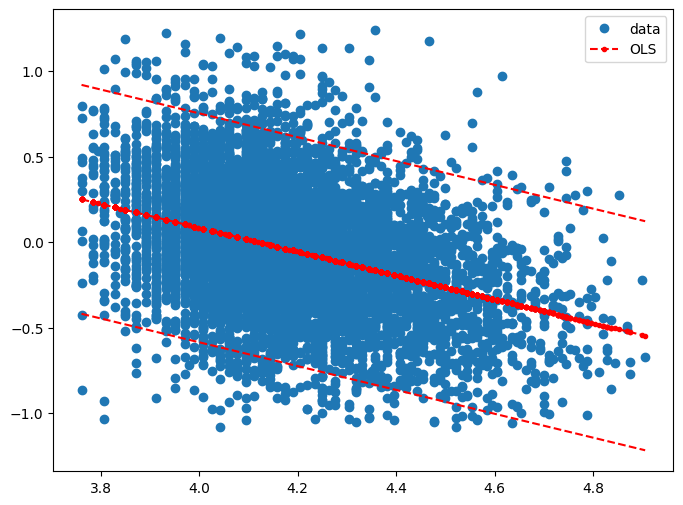

In [ ]:
res=sm.OLS(Y, X1).fit()
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, res.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

J_n = 0.6164979153449828
upper_p_value = 0.8417131389876277


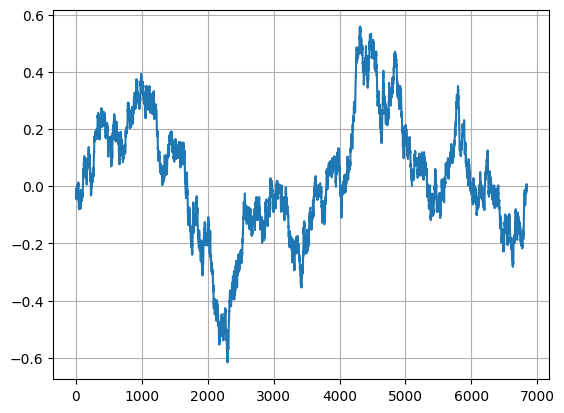

In [ ]:
# Эмпирический мост
simple_regr_res=Y-res.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)
print('J_n =',J)
print('upper_p_value =',p_value)

plt.plot(emp_bridge)
plt.grid()
plt.show()

In [ ]:
# стохастическое моделирование
n_iter=20000
n=len(X)
counter=0
for i in range(n_iter):
  Y_temp=stats.norm.rvs(0,1,n)*sigma+X
  res=sm.OLS(Y_temp, X1).fit()
  simple_regr_res=Y_temp-res.fittedvalues
  sum_regr_res=np.cumsum(simple_regr_res)
  emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/np.std(simple_regr_res)
  J_temp=np.max(np.abs(emp_bridge))
  if J_temp>J:
    counter+=1
print('Эмпирическое пи-значение =',counter/n_iter)

Эмпирическое пи-значение = 0.60155


## Регрессия на X^2

In [ ]:
arr=data1.to_numpy()
X=arr[:,0]
Y=arr[:,1]

X2=np.power(X,2)
X2_1 = sm.add_constant(X2)
results=sm.OLS(Y, X2_1).fit()
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     1076.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          2.51e-219
Time:                        13:00:24   Log-Likelihood:                -2352.7
No. Observations:                6842   AIC:                             4709.
Df Residuals:                    6840   BIC:                             4723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3949      0.044     31.710      0.0

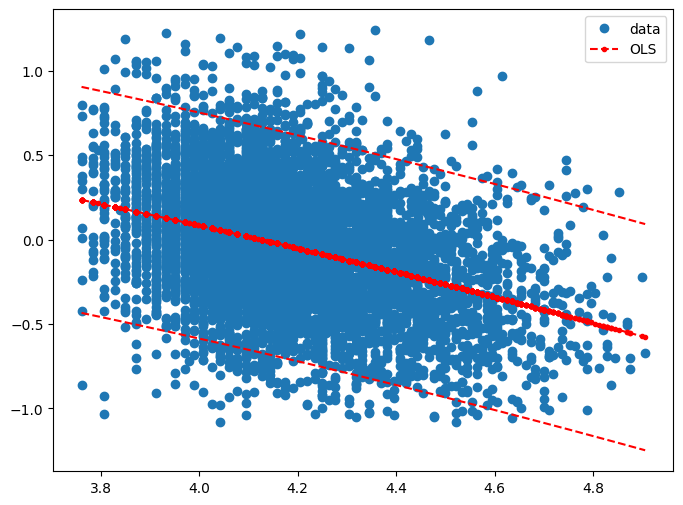

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, results.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

J_n = 0.6001292108664534
upper_p_value = 0.8641116416717209


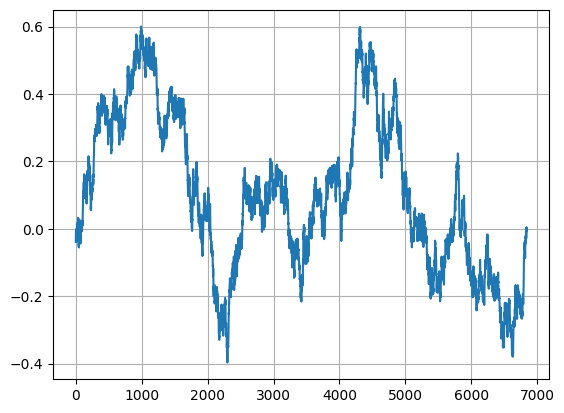

In [ ]:
# Эмпирический мост
simple_regr_res=Y-results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)
print('J_n =', J)
print('upper_p_value =', p_value)
plt.plot(emp_bridge)
plt.grid()
plt.show()

In [ ]:
# стохастическое моделирование
n_iter=20000
n=len(X)
counter=0
for i in range(n_iter):
  Y_temp=stats.norm.rvs(0,1,n)*sigma+X
  res=sm.OLS(Y_temp, X1).fit()
  simple_regr_res=Y_temp-res.fittedvalues
  sum_regr_res=np.cumsum(simple_regr_res)
  emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/np.std(simple_regr_res)
  J_temp=np.max(np.abs(emp_bridge))
  if J_temp>J:
    counter+=1
print('Эмпирическое пи-значение =',counter/n_iter)


Эмпирическое пи-значение = 0.64875


## Логарифмическая модель
Построение логарифмической модели невозможно при наличии отрицательных данных (они появились в результате предварительного логарифмирования)